# <center>1. Первинний аналіз даних з Pandas</center>
## <center>1.1 Робота з векторами в бібліотеці NumPy</center>

**Numpy** - це бібліотека Python для обчислювально ефективних операцій з багатовимірними масивами, призначена в основному для наукових обчислень.

In [ ]:
import numpy as np


In [ ]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

Такий масив може містити:
- значення фізичних величин в різні моменти часу при моделюванні
- значення сигналу, виміряного пристроєм
- інтенсивності пікселів 
- 3D координати об'єктів, отримані, наприклад, при МРТ
- ...


**Навіщо NumPy:** Ефективність базових операцій 


In [ ]:
L = range(1000)

In [92]:
%timeit [i**2 for i in L]

1000 loops, best of 3: 258 µs per loop


In [93]:
a = np.arange(1000)

In [94]:
%timeit a**2

The slowest run took 92.24 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.46 µs per loop


Інтерактивна справка


In [95]:
?np.array

пошук в документації


In [96]:
np.lookfor('create array') 

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.lib.Arrayterator
    Buffered iterator for big arrays.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.ma.mvoid.__new__
    Create a new masked array from scratch.
numpy.ma.MaskedArray.__new__
    Create a 

In [97]:
np.con*?

#### Бібліотеку принято імпортувати так

In [ ]:
import numpy as np

## Створення масивів

* **1-D**:


In [98]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

In [99]:
a.ndim

1

In [100]:
a.shape

(4,)

In [101]:
len(a)

4

* **2-D, 3-D, ...**:


In [104]:
b = np.array([[0, 1, 2], [3, 4, 5]])    # 2 x 3 array
b

array([[0, 1, 2],
       [3, 4, 5]])

In [105]:
b.ndim

2

In [ ]:
b.shape

(2, 3)

In [106]:
len(b)     # returns the size of the first dimension

2

In [107]:
c = np.array([[[1], [2]], [[3], [4]]])
c

array([[[1],
        [2]],

       [[3],
        [4]]])

In [108]:
c.shape

(2, 2, 1)

## Методи для створення масивів

На практиці ми рідко додаємо елементи по одному


- Рівномірно розподілені елементи:


In [109]:
a = np.arange(10) # 0 .. n-1  (!)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [110]:
b = np.arange(1, 9, 2) # start, end (exclusive), step
b

array([1, 3, 5, 7])

- за числом елементів:


In [111]:
c = np.linspace(0, 1, 6)   # start, end, num-points
c

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [112]:
d = np.linspace(0, 1, 5, endpoint=False)
d

array([0. , 0.2, 0.4, 0.6, 0.8])

- Масиви, що часто зустрічаються:


In [113]:
a = np.ones((3, 3))  # reminder: (3, 3) is a tuple
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [114]:
b = np.zeros((2, 2))
b

array([[0., 0.],
       [0., 0.]])

In [115]:
c = np.eye(3)
c

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [116]:
d = np.diag(np.array([1, 2, 3, 4]))
d

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

* `np.random` генерація випадкових чисел (Mersenne Twister PRNG):

In [ ]:
a = np.random.rand(4)       # uniform in [0, 1]
a  

array([0.50755507, 0.0211933 , 0.43352176, 0.44631306])

In [117]:
b = np.random.randn(4)      # Gaussian
b  

array([-1.31386475,  0.88462238,  0.88131804,  1.70957306])

In [ ]:
np.random.seed(1234)        # Setting the random seed

## Основні типи даних NumPy

Точка після числа означає, що це тип даних `float64`


In [ ]:
a = np.array([1, 2, 3])
a.dtype

dtype('int64')

In [ ]:
b = np.array([1., 2., 3.])
b.dtype

dtype('float64')

Можна задати тип даних явно. За замовчуванням- `float64`

In [ ]:
c = np.array([1, 2, 3], dtype=float)
c.dtype

dtype('float64')

In [ ]:
a = np.ones((3, 3))
a.dtype

dtype('float64')

Інші типи даних:

- Комплексні числа


In [ ]:
d = np.array([1+2j, 3+4j, 5+6*1j])
d.dtype

dtype('complex128')

 - Bool


In [ ]:
e = np.array([True, False, False, True])
e.dtype

dtype('bool')

- Рядки

На рядки пам'ять виділяється "жадібно" - за максимальною кількістю літер в рядку. 
В цьому прикладі на кожен рядок виділяється по 7 літер, і тип даних - 'S7'

In [ ]:
f = np.array(['Bonjour', 'Hello', 'Hallo',])
f.dtype     # <--- strings containing max. 7 letters

dtype('<U7')

## Основи візуалізації

$ ipython notebook --pylab=inline

Або з notebook:

In [118]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Параметр `inline` говорить серверу IPython про те, що результати будуть відображатися в самій зошиті, а не в новому вікні.


Імпортуємо *Matplotlib*


In [119]:
import matplotlib.pyplot as plt  # the tidy way

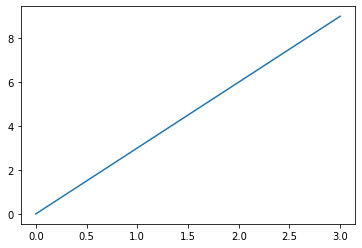

In [120]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)       # line plot    
plt.show()           # <-- shows the plot (not needed with pylab) 

Або з використанням *pylab*:


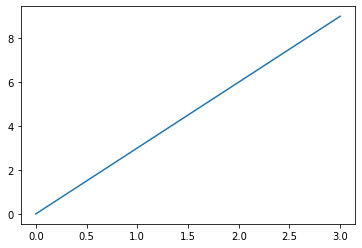

In [ ]:
plot(x, y)       # line plot    

Використання `import matplotlib.pyplot as plt` рекомендується для скриптів, а` pylab` - в зошитах IPython.

- Відображення одновимірних масивів:


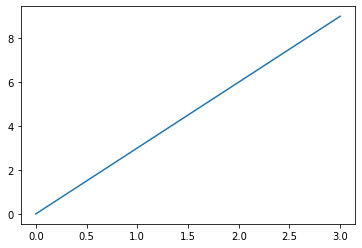

In [ ]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)       # line plot    

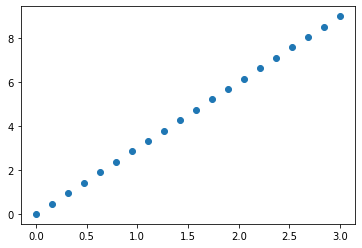

In [ ]:
plt.plot(x, y, 'o')  # dot plot    

- Відображення двохвимірних масивів (наприклад, зображень):


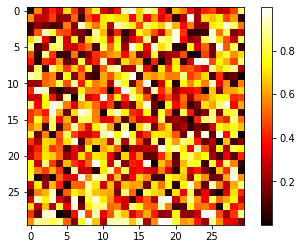

In [121]:
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)    
plt.colorbar()    

## Індексування масивів і зрізи

В цілому так само, як з вбудованими послідовностями Python (наприклад, як зі списками).


In [ ]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
a[0], a[2], a[-1]

(0, 2, 9)

Працює і популярний в Python спосіб відображення масиву:


In [ ]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

Для багатовимірних масивів індекси - це кортежі цілих чисел

In [122]:
a = np.diag(np.arange(3))
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [124]:
a[1, 1]

1

In [125]:
a[2, 1] = 10 # third line, second column
a

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

In [126]:
a[1]

array([0, 1, 0])

**Зрізи**

In [127]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
a[2:9:3] # [start:end:step]

array([2, 5, 8])

Останній індекс не включається

In [ ]:
a[:4]

array([0, 1, 2, 3])

За замовчуванням \`start\` -  0,
\`end\` - індекс останнього елемента, \`step\` - 1:


In [ ]:
a[1:3]

array([1, 2])

In [128]:
a[::2]

array([0, 2, 4, 6, 8])

In [129]:
a[3:]

array([3, 4, 5, 6, 7, 8, 9])

Можна поєднувати присвоювання і сріз:


In [ ]:
a = np.arange(10)
a[5:] = 10
a

array([ 0,  1,  2,  3,  4, 10, 10, 10, 10, 10])

In [ ]:
b = np.arange(5)
a[5:] = b[::-1]
a

array([0, 1, 2, 3, 4, 4, 3, 2, 1, 0])

## Індексація масками

In [130]:
np.random.seed(3)
a = np.random.random_integers(0, 20, 15)  #low, high, size
a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 20 + 1) instead
  


array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 20, 12,  7, 14])

In [131]:
(a % 3 == 0)

array([False,  True, False,  True, False, False, False,  True, False,
        True,  True, False,  True, False, False])

In [ ]:
mask = (a % 3 == 0)
extract_from_a = a[mask] # or,  a[a%3==0]
extract_from_a           # extract a sub-array with the mask

array([ 3,  0,  9,  6,  0, 12])

Індексація маскою може бути дуже корисною для присвоювання значень частині елементів масиву:


In [ ]:
a[a % 3 == 0] = -1
a

array([10, -1,  8, -1, 19, 10, 11, -1, 10, -1, -1, 20, -1,  7, 14])

### Індексація масивом цілих чисел

In [ ]:
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
a[[2, 3, 2, 4, 2]]  # note: [2, 3, 2, 4, 2] is a Python list

array([20, 30, 20, 40, 20])

In [ ]:
a[[9, 7]] = -100
a

array([   0,   10,   20,   30,   40,   50,   60, -100,   80, -100])

In [ ]:
a = np.arange(10)
idx = np.array([[3, 4], [9, 7]])
idx.shape

(2, 2)

In [ ]:
a[idx]

array([[3, 4],
       [9, 7]])